In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import io 
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
data = pd.read_csv(io.StringIO(uploaded['creditcard.csv'].decode('utf-8')), sep = ',')

In [5]:
data = data.sample(frac=1)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146341,87618.0,-1.188023,1.402850,-0.115269,-2.902346,1.059372,-0.708785,1.292986,-0.115982,0.607453,-0.327677,-1.384558,0.101973,0.487422,-0.197925,-0.408304,0.414282,-1.124265,-0.690581,-0.623265,0.369348,-0.419490,-0.960387,-0.146526,0.040622,0.200445,0.393503,0.541537,0.347908,5.00,0
150283,92960.0,-5.181749,-3.491663,1.091116,-2.822937,0.520875,2.054506,-0.382273,0.772024,5.002985,-2.216892,1.162080,-0.486926,2.161690,-0.192243,-1.746434,-1.041022,0.759384,-0.110700,-0.282182,-1.632608,-0.712090,1.266915,1.444154,-0.898614,1.596639,-0.562148,0.576295,0.334002,222.04,0
183012,125618.0,2.013340,-0.835831,-1.860770,-1.692266,1.624803,3.497323,-1.183704,0.967209,1.185420,-0.266284,0.174651,0.479539,0.051615,0.165526,1.488585,0.329500,-0.603894,-0.489116,0.047955,-0.065553,-0.180364,-0.556102,0.456337,0.720000,-0.658755,0.549616,-0.036629,-0.052929,14.78,0
258886,158865.0,-0.168758,0.141743,0.676526,1.245243,0.521961,0.277141,0.201714,0.165156,0.273658,0.005016,0.081160,1.186443,0.163647,-0.231945,-1.740196,-0.608357,-0.144179,-0.131836,1.456669,-0.188298,-0.363155,-0.659793,0.681211,-0.469997,-1.172465,-1.094717,0.173466,0.105114,12.77,0
49215,43959.0,1.480367,-0.285405,0.202853,-0.887012,-0.502047,-0.575761,-0.389993,-0.258596,-1.027797,0.565402,-0.621736,0.107557,2.036558,-0.509404,0.646683,1.361568,-0.164434,-1.595802,0.954561,0.193513,-0.176102,-0.536736,0.032233,-0.440830,0.394730,-0.469654,0.017419,0.016165,3.95,0


In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 146341 to 275199
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21  

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.173227e-15,3.549976e-16,-1.410129e-15,2.098802e-15,9.953326e-16,1.501063e-15,-5.817249e-16,1.071881e-16,-2.391215e-15,2.226763e-15,1.691672e-15,-1.261867e-15,7.726366e-16,1.241768e-15,4.890722e-15,1.432802e-15,-3.967773e-16,9.522839e-16,1.055445e-15,6.459749e-16,1.719556e-16,-3.499175e-16,2.590937e-16,4.480606e-15,5.191190e-16,1.689140e-15,-3.635836e-16,-1.218887e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
fraud = data[data['Class']==1]
valid = data[data['Class']!=1]
print(f'Fraud transections: {len(fraud)}')
print(f'Valid transections: {len(valid)}')

Fraud transections: 492
Valid transections: 284315


In [13]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
x

array([[ 8.76180000e+04, -1.18802345e+00,  1.40284986e+00, ...,
         5.41537184e-01,  3.47908209e-01,  5.00000000e+00],
       [ 9.29600000e+04, -5.18174929e+00, -3.49166291e+00, ...,
         5.76294551e-01,  3.34002128e-01,  2.22040000e+02],
       [ 1.25618000e+05,  2.01334000e+00, -8.35830828e-01, ...,
        -3.66291076e-02, -5.29289290e-02,  1.47800000e+01],
       ...,
       [ 1.55109000e+05, -9.18412391e-01,  2.17491245e+00, ...,
        -4.56453286e-01, -3.07513623e-02,  7.18000000e+00],
       [ 7.05080000e+04,  6.54419404e-01, -2.57783489e+00, ...,
        -4.23065588e-02,  6.84921781e-02,  4.75150000e+02],
       [ 1.66418000e+05, -5.39648481e+00,  5.27398590e+00, ...,
         9.86996729e-01, -1.09647097e-01,  1.52000000e+00]])

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0])

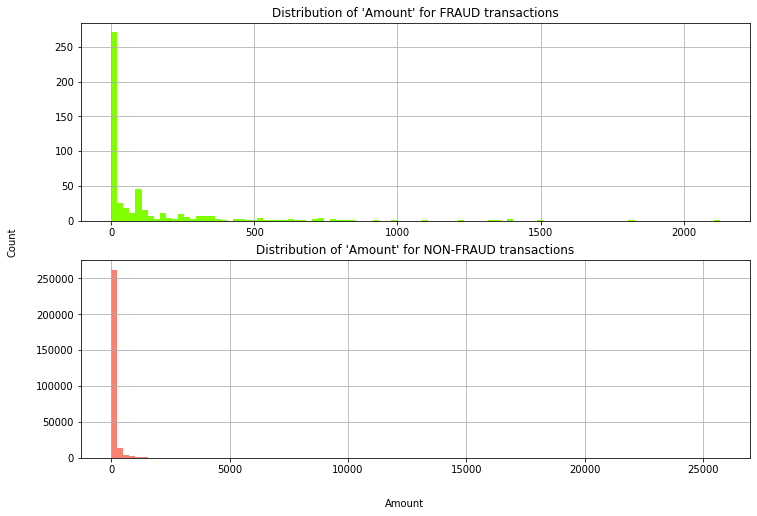

In [23]:
FRAUD = data[data['Class']==1]
NONFRAUD = data[data['Class']==0]

fig, ax = plt.subplots(2,1, figsize=(12, 8))

ax[0].hist(FRAUD['Amount'], bins=100, color='Chartreuse')
ax[0].set_title("Distribution of 'Amount' for FRAUD transactions")
ax[0].grid()
ax[1].hist(NONFRAUD['Amount'], bins=100, color='Salmon')
ax[1].set_title("Distribution of 'Amount' for NON-FRAUD transactions")
ax[1].grid()

fig.text(0.5, 0.04, 'Amount', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')


plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x.shape

(284807, 30)

In [18]:
y.shape

(284807,)

In [19]:
X_train,X_test,  Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state= 0 )
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [20]:
X_train.shape

(159491, 30)

In [21]:
Y_train.shape

(159491,)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [35]:
network = Sequential()

In [46]:
network.add(layers.Dense(10, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
network_history = network.fit(X_train, Y_train, epochs=3, batch_size=500, validation_data=(X_val, Y_val))

Epoch 1/3
319/319 [==============================] - 2s 4ms/step - loss: 0.6480 - accuracy: 0.9787 - val_loss: 0.2640 - val_accuracy: 0.9985
Epoch 2/3
319/319 [==============================] - 1s 3ms/step - loss: 0.1593 - accuracy: 0.9983 - val_loss: 0.0359 - val_accuracy: 0.9985
Epoch 3/3
319/319 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9983 - val_loss: 0.0218 - val_accuracy: 0.9985


In [47]:
train_loss = network_history.history['loss']
val_loss = network_history.history['val_loss']
epochs = range(1,4)

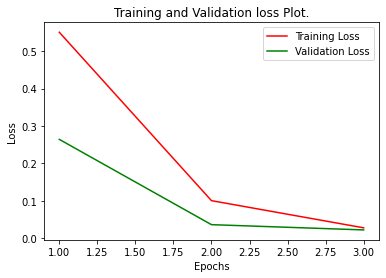

In [48]:
plt.plot(epochs, train_loss, 'r', label='Training Loss' )
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss Plot.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
network.predict(X_test)

array([[0.0079127],
       [0.0079127],
       [0.0079127],
       ...,
       [0.0079127],
       [0.0079127],
       [0.0079127]], dtype=float32)

In [50]:
network.evaluate(X_test, Y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0233 - accuracy: 0.9982


[0.02330194227397442, 0.9981625080108643]